In [1]:
%matplotlib inline


# Tomek links


An illustration of the Tomek links method.



Automatically created module for IPython interactive environment


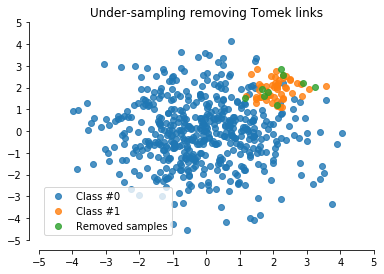

In [2]:
# Authors: Andreas Mueller
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT


import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from imblearn.under_sampling import TomekLinks

print(__doc__)

rng = np.random.RandomState(0)
n_samples_1 = 500
n_samples_2 = 50
X_syn = np.r_[1.5 * rng.randn(n_samples_1, 2),
              0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y_syn = np.array([0] * (n_samples_1) + [1] * (n_samples_2))
X_syn, y_syn = shuffle(X_syn, y_syn)
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn,
                                                                    y_syn)

# remove Tomek links
tl = TomekLinks(return_indices=True)
X_resampled, y_resampled, idx_resampled = tl.fit_sample(X_syn, y_syn)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_syn.shape[0]),
                                   idx_resampled)
idx_class_0 = y_resampled == 0
plt.scatter(X_resampled[idx_class_0, 0], X_resampled[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_resampled[~idx_class_0, 0], X_resampled[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_syn[idx_samples_removed, 0], X_syn[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.yticks(range(-5, 6))
plt.xticks(range(-5, 6))

plt.title('Under-sampling removing Tomek links')
plt.legend()

plt.show()